### Multiple Linear Regression Model

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
df = pd.read_csv("economic_index.csv")

In [5]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [6]:
## drop unnecessary columns
df.drop(columns=['Unnamed: 0', 'year', 'month'], axis=1, inplace=True)

In [7]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [8]:
## check fro null values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

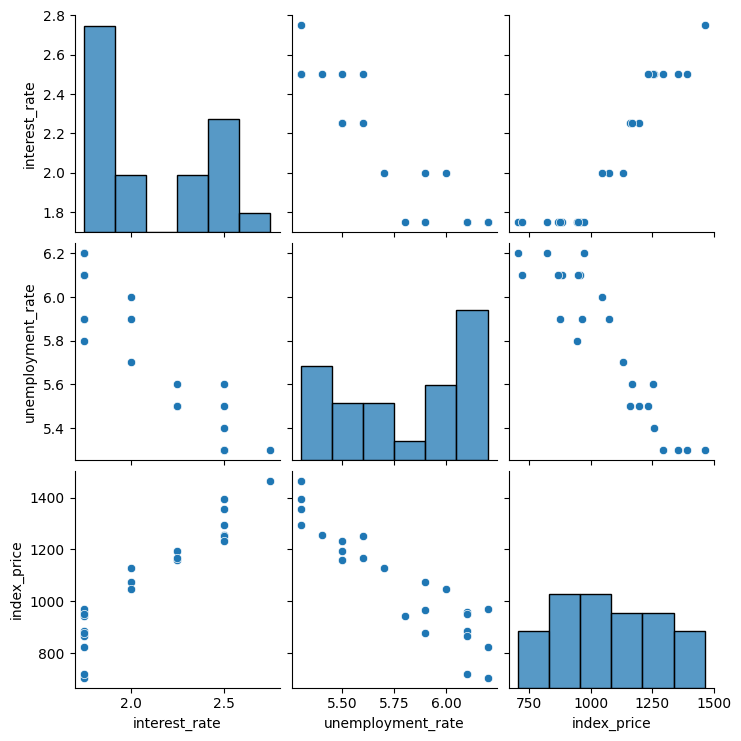

In [9]:
## Visualize the data
import seaborn as sns
sns.pairplot(df)

In [10]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0.5, 1.0, 'Interest Rate vs Unemployment Rate')

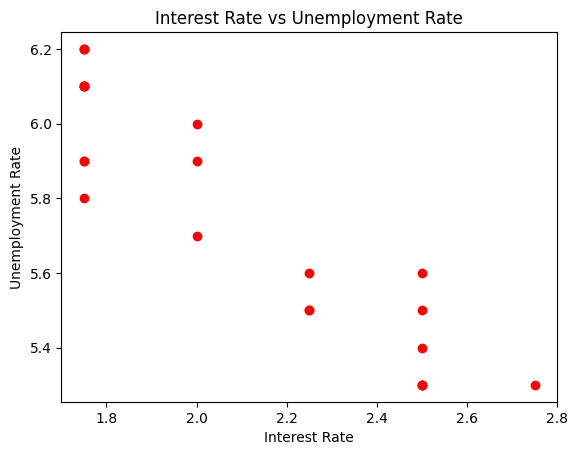

In [11]:
## create a machine learning algorithm to predict 
## visualize the datapoints more closely

plt.scatter(df['interest_rate'], df['unemployment_rate'], color='red')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')
plt.title('Interest Rate vs Unemployment Rate')

In [12]:
## det independent and dependent features
X = df[['interest_rate', 'unemployment_rate']]
Y = df['index_price']
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [13]:
## split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)



<Axes: xlabel='interest_rate', ylabel='index_price'>

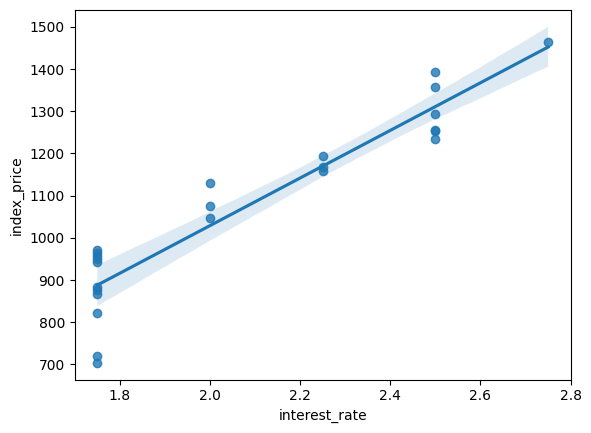

In [14]:
sns.regplot(x=df['interest_rate'], y=df['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

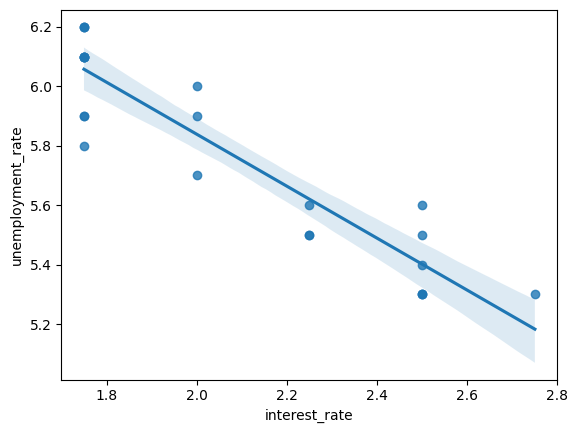

In [15]:
sns.regplot(x=df['interest_rate'], y=df['unemployment_rate'])

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

(18, 2)

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [19]:
model.fit(X_train, Y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [20]:
## to do the cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(model, X_train, Y_train,scoring='neg_mean_squared_error', cv=3)
print("Validation MSE Scores: ", validation_score)
print("Average Validation MSE: ", np.mean(validation_score))

Validation MSE Scores:  [-4921.61331265 -7686.87497294 -5135.9962549 ]
Average Validation MSE:  -5914.8281801623925


In [21]:
## prediction
Y_pred = model.predict(X_test)
print(Y_pred)

[1204.22770398  821.65051903 1406.51300368  857.70889608  994.90992298
 1168.16932693]


In [22]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)
print("R^2 Score: ", r2)

Mean Squared Error:  5793.7628877125835
Mean Absolute Error:  59.9357815232356
Root Mean Squared Error:  76.11677139574815
R^2 Score:  0.8278978091457141


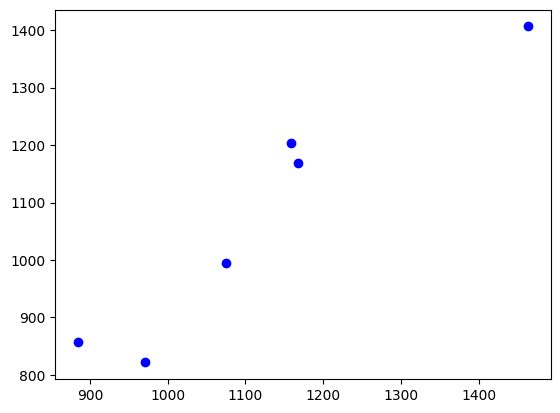

In [23]:
## Assumptions
plt.scatter(Y_test, Y_pred, color='blue')

In [24]:
residual = Y_test - Y_pred
print(residual)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


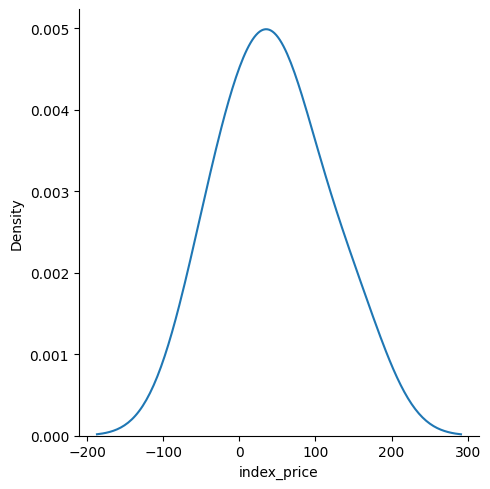

In [25]:
## plot the residuals
sns.displot(residual, kind="kde")

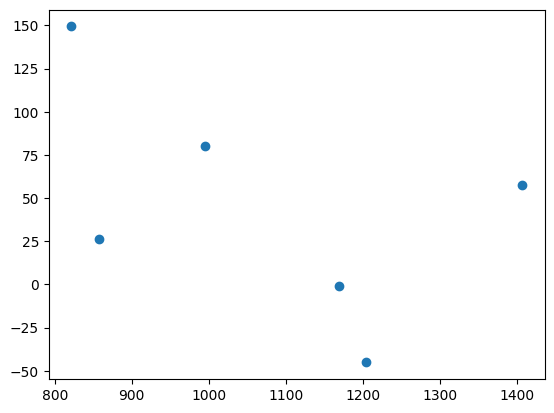

In [26]:
## create a scatter plot to prediction and residuals 
plt.scatter(Y_pred, residual)

In [27]:
## find OLS
import statsmodels.api as sm
model = sm.OLS(Y_train, X_train).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Mon, 09 Feb 2026   Prob (F-statistic):                       0.754
Time:                        16:37:25   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
print("Parameters: ", model.params)

Parameters:  x1     88.272755
x2   -116.257161
dtype: float64


In [29]:
## predict ant data
predicided_data = model.predict(scaler.transform([[3.5, 6.0]]))
print(predicided_data)

[295.91273828]


/Users/pramodkumar/Python/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
